# Exploratory Data Analysis (EDA)

In this Notebook we explore the the training data structure given to us and see the problem to be solved in grater detail. 

In [1]:
# import libraries : 

import os 
import random 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# set random seed : 
np.random.seed( 41 )

# import torch
# import torch.nn as nn 
# import torch.utils.truth as data 
# import torch.functional as F 
# from torch import Tensor 

# from typing import Optional, Tuple

For the purpose of EDA we will only look at a small section of (100 events) of the training data. 

A general description of the data can be found at [Kaggle](https://www.kaggle.com/competitions/trackml-particle-identification/data?select=sample_submission.csv.zip).

In [2]:
# Set a list for train data file types:  
train_FileType = [
    'hits' , 'cells' , 
    'particles' , 'truth'
]

test_FileType = [
    'hits' , 'cells'
]

train_dataset_path = '../data/train_100_events/'

events = [
    code[:-9] for code in os.listdir(train_dataset_path) if code.endswith('-hits.csv') 
]
print(f'lenght of events list: {len(events)}')

# choose a event at random 
event = str(np.random.choice( events ) )
event 

lenght of events list: 100


'event000001044'

In [3]:
def read_event_files(path:str,eventid:str,train:bool=True)->dict: 
    if train : 
        FileType = train_FileType 
    else : 
        FileType = test_FileType
    data = {
        ftype : pd.read_csv(path + eventid + '-' + ftype + '.csv' ) for ftype in FileType 
    }
    return data 

event_data = read_event_files(train_dataset_path,event)

In [4]:
event_data.keys()

dict_keys(['hits', 'cells', 'particles', 'truth'])

In [5]:
hits = event_data['hits']
display(hits)
dash = '-'*35
print( "{:<30s}:{:<10d}".format('Total Number of Hits' ,hits.shape[0]) )
print(dash)
print("{:<30s}:{:<10d}".format('Unique volumeId',hits.volume_id.unique().shape[0] ))
print(dash)
print("{:<30s}:{:<10d}".format('Unique layerId',hits.layer_id.unique().shape[0] ))
print(dash)
print("{:<30s}:{:<10d}".format('Unique moduleId',hits.module_id.unique().shape[0]) )

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.1923,-12.29940,-1502.5,7,2,1
1,2,-57.1259,-8.88443,-1502.5,7,2,1
2,3,-50.0794,1.95183,-1502.5,7,2,1
3,4,-84.5126,-10.53830,-1502.5,7,2,1
4,5,-99.1284,-12.89230,-1502.5,7,2,1
...,...,...,...,...,...,...,...
93825,93826,-754.1830,40.23210,2944.5,18,12,97
93826,93827,-939.8770,63.34040,2952.5,18,12,98
93827,93828,-933.5140,-1.14643,2952.5,18,12,98
93828,93829,-905.0360,120.24500,2952.5,18,12,98


Total Number of Hits          :93830     
-----------------------------------
Unique volumeId               :9         
-----------------------------------
Unique layerId                :7         
-----------------------------------
Unique moduleId               :2998      


In [6]:
x = hits.to_numpy(dtype = int)[: ,[0,*list(range(4,7))]]
x[-1]

array([93830,    18,    12,    98])

In [7]:
cells = event_data['cells']
display( cells )

dash = '-'*35
print( "{:<30s}:{:<10d}".format('Total Number of Cell Entries' ,cells.shape[0]) )

,hit_id,ch0,ch1,value
0,1,312,621,0.323702
1,2,255,491,0.295110
2,3,50,351,0.297374
3,4,245,979,0.207498
4,4,245,978,0.097640
...,...,...,...,...
516443,93827,635,7,1.000000
516444,93828,101,6,1.000000
516445,93828,102,6,1.000000
516446,93829,1126,4,1.000000


Total Number of Cell Entries  :516448    


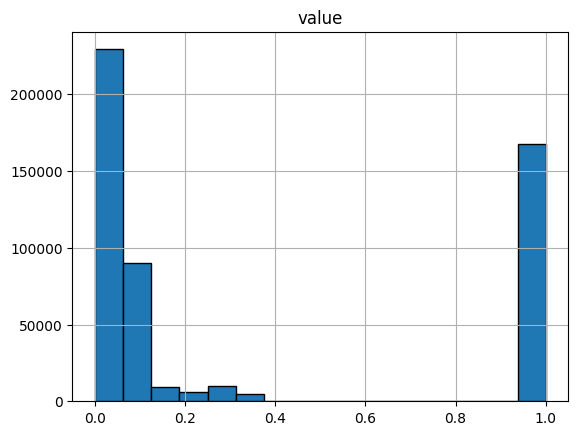

In [8]:
cells.hist( 'value' , bins = 16 , edgecolor = 'k'); 

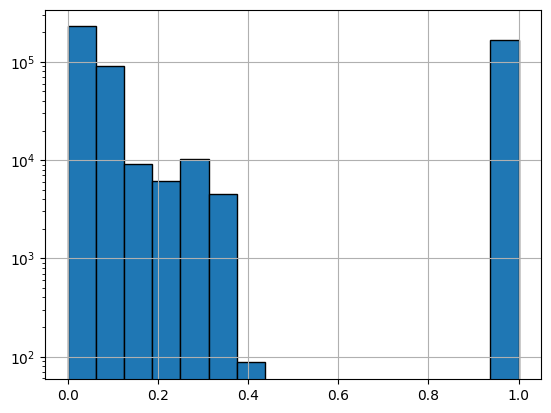

In [9]:
plt.hist(cells.value , bins = 16 , edgecolor = 'k' )
plt.semilogy()
plt.grid()
plt.show()

In [10]:
hits['ncells']=cells.hit_id.value_counts().get( hits.hit_id , 0 ).to_numpy()

In [11]:
hits

,hit_id,x,y,z,volume_id,layer_id,module_id,ncells
0,1,-64.1923,-12.29940,-1502.5,7,2,1,1
1,2,-57.1259,-8.88443,-1502.5,7,2,1,1
2,3,-50.0794,1.95183,-1502.5,7,2,1,1
3,4,-84.5126,-10.53830,-1502.5,7,2,1,2
4,5,-99.1284,-12.89230,-1502.5,7,2,1,1
...,...,...,...,...,...,...,...,...
93825,93826,-754.1830,40.23210,2944.5,18,12,97,1
93826,93827,-939.8770,63.34040,2952.5,18,12,98,2
93827,93828,-933.5140,-1.14643,2952.5,18,12,98,2
93828,93829,-905.0360,120.24500,2952.5,18,12,98,1


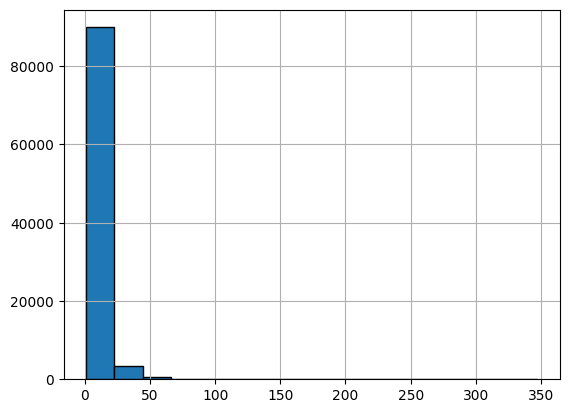

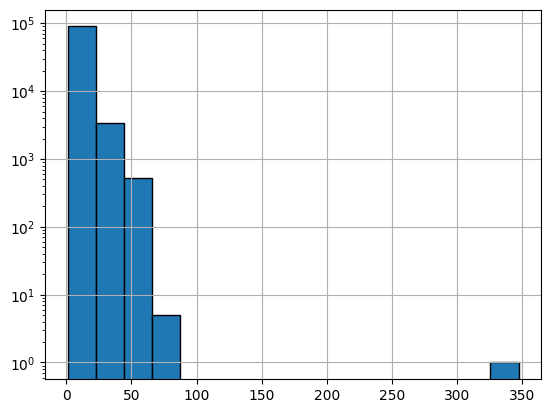

In [12]:
plt.hist( hits.ncells , bins = 16  , edgecolor = 'k' )
plt.grid()
plt.show()

plt.hist( hits.ncells , bins = 16  , edgecolor = 'k' )
plt.semilogy()
plt.grid()
plt.show()

In [13]:
particles = event_data['particles']
display(particles)

dash = '-'*35
print( "{:<30s}:{:<10d}".format('Total Number of Particels' ,particles.shape[0]) )
print(dash)
print("{:<30s}:{:<10d}".format('Unique q',particles.q.unique().shape[0] ))
print(dash)
print("{:<30s}:{:<10d}".format('Max Nhits',particles.nhits.max() ))
print(dash)
print("{:<30s}:{:<10d}".format('Min Nhits',particles.nhits.min()) )
print(dash)
print("{:<30s}:{:<10.3f}".format('Mean Nhits',particles.nhits.mean()) )

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.038125,0.037116,-0.812826,-0.459110,-0.188714,1.024080,1,13
1,4503874505277440,-0.038125,0.037116,-0.812826,-0.211224,0.027049,1.844940,-1,1
2,4503943224754176,-0.038125,0.037116,-0.812826,-1.652540,-4.047730,4.849760,-1,12
3,4504011944230912,-0.038125,0.037116,-0.812826,-2.964770,-7.360820,9.675020,-1,7
4,4504080663707648,-0.038125,0.037116,-0.812826,-0.270572,-1.108510,1.507600,-1,10
...,...,...,...,...,...,...,...,...,...
8959,792637588866334720,0.013297,-0.011664,5.618780,-0.158405,0.247198,2.792610,1,1
8960,792637657585811456,0.013297,-0.011664,5.618780,0.007935,-0.130331,2.060340,-1,0
8961,792637588883116033,-18.073200,30.568000,343.189000,-0.243690,-0.098887,-0.032140,1,12
8962,792637588883120130,-18.073200,30.568000,343.189000,0.164705,-0.056398,0.005837,1,7


Total Number of Particels     :8964      
-----------------------------------
Unique q                      :2         
-----------------------------------
Max Nhits                     :21        
-----------------------------------
Min Nhits                     :0         
-----------------------------------
Mean Nhits                    :8.485     


In [14]:
truth = event_data['truth']
display(truth)

dash = '-'*35
print( "{:<30s}:{:<10.4f}".format('Sum of Weights' ,truth.weight.sum()) )

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,387315615267815424,-64.2003,-12.32290,-1502.5,-0.471179,-0.069171,-10.78430,0.000010
1,2,716075914164699136,-57.1105,-8.87768,-1502.5,-0.538323,-0.100206,-14.20230,0.000011
2,3,783649493626126336,-50.0640,1.94813,-1502.5,-0.230373,0.045519,-4.44486,0.000027
3,4,562952289883521024,-84.5067,-10.51950,-1502.5,-0.525577,-0.088762,-9.48532,0.000009
4,5,779123491449339904,-99.1279,-12.87000,-1502.5,-0.702163,-0.058685,-10.58250,0.000015
...,...,...,...,...,...,...,...,...,...
93825,93826,45047334987366400,-753.9030,40.21250,2944.5,-0.387699,0.112258,1.52698,0.000010
93826,93827,121612033345978368,-937.8110,63.20690,2952.5,-0.609649,-0.067115,2.03717,0.000013
93827,93828,698060347424112640,-930.7140,-1.31804,2952.5,-1.714210,-0.107365,5.53359,0.000029
93828,93829,774620853894643712,-901.7360,120.01800,2952.5,-0.338850,0.151078,1.16360,0.000009


Sum of Weights                :1.0000    


### 1. See the influence of fake particles : 

In [15]:
# see where there are no acctual particles : 

# idx holds the indices of the truth table where particle id == 0 
idx = truth.index[ truth.particle_id == 0 ]
print(f'num fake hits:\t{len(idx)}')

# Let us see these hits and their truth values first : 
display(hits.loc[idx])
display(truth.loc[idx])

num fake hits:	17766


,hit_id,x,y,z,volume_id,layer_id,module_id,ncells
7,8,-52.0421,-7.13015,-1502.5,7,2,1,2
22,23,-169.0070,-2.53146,-1502.0,7,2,2,4
24,25,-168.6590,-12.97810,-1502.0,7,2,2,2
34,35,-131.4140,-21.94390,-1498.0,7,2,3,3
62,63,-52.6099,-16.73520,-1502.0,7,2,6,5
...,...,...,...,...,...,...,...,...
93806,93807,-786.8420,393.73400,2955.5,18,12,92,2
93807,93808,-806.0490,266.07700,2944.5,18,12,93,1
93813,93814,-772.5470,203.00000,2944.5,18,12,93,3
93816,93817,-770.5450,210.47000,2947.5,18,12,95,1


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
7,8,0,-52.0427,-7.13651,-1502.5,-119065.0,-76487.6,-989936.0,0.0
22,23,0,-169.0070,-2.52015,-1502.0,217890.0,-77049.7,-972927.0,0.0
24,25,0,-168.6550,-12.96720,-1502.0,251666.0,-78917.2,-964591.0,0.0
34,35,0,-131.4150,-21.95020,-1498.0,-161509.0,97239.5,-982069.0,0.0
62,63,0,-52.6087,-16.73660,-1502.0,-518143.0,110786.0,-848089.0,0.0
...,...,...,...,...,...,...,...,...,...
93806,93807,0,-787.2490,393.88200,2955.5,283039.0,82287.7,955572.0,0.0
93807,93808,0,-807.1780,266.47000,2944.5,78854.3,-158087.0,984272.0,0.0
93813,93814,0,-770.4600,202.29100,2944.5,240194.0,-322710.0,915513.0,0.0
93816,93817,0,-770.6500,210.48700,2947.5,-195601.0,-15614.3,980559.0,0.0


In [16]:
# also check the cells data frame for these hits : 
fake_hitid = hits.loc[idx].hit_id.to_numpy()
fake_cells = cells.loc[ cells.hit_id.isin( fake_hitid )]
fake_cells 

,hit_id,ch0,ch1,value
8,8,228,398,0.151490
9,8,228,399,0.125253
34,23,61,1155,0.009700
35,23,62,1153,0.012774
36,23,62,1155,0.020045
...,...,...,...,...
516422,93814,68,4,1.000000
516423,93814,66,4,1.000000
516424,93814,67,4,1.000000
516428,93817,1002,4,1.000000


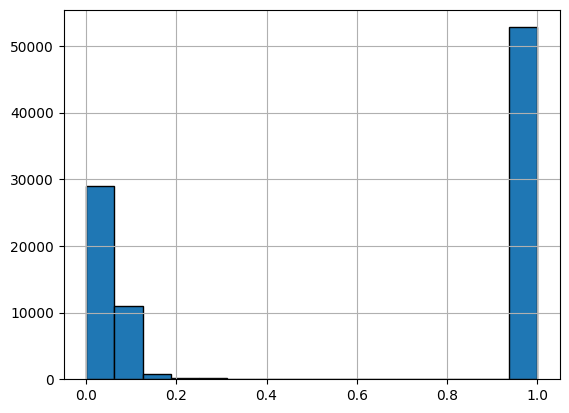

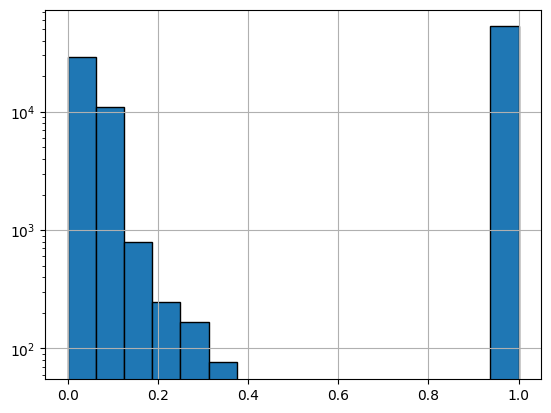

In [17]:
plt.hist( fake_cells.value , bins = 16 , edgecolor = 'k')
plt.grid()
plt.show()

plt.hist( fake_cells.value , bins = 16 , edgecolor = 'k')
plt.semilogy()
plt.grid()
plt.show()

### 2. Statistics of the variation of the acctual particle hit coordinates vs recorded particle hit coordinates. 

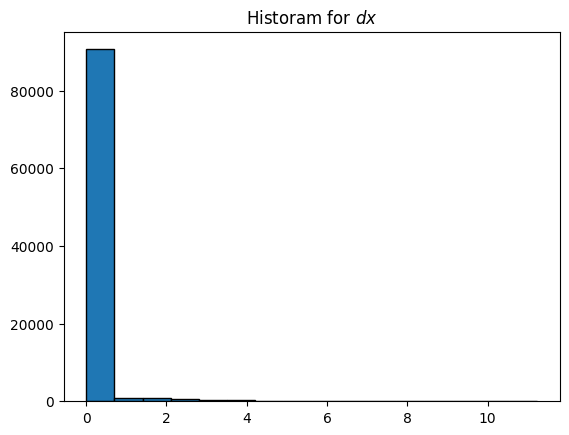

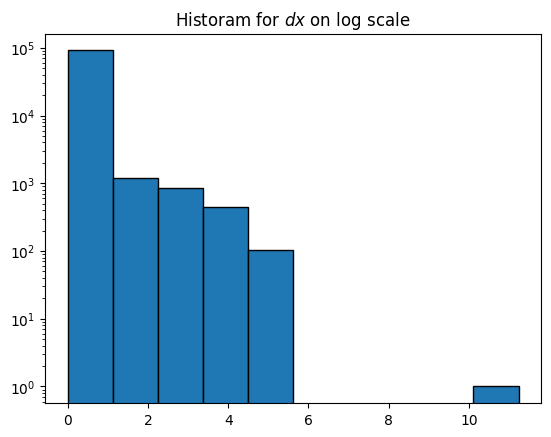

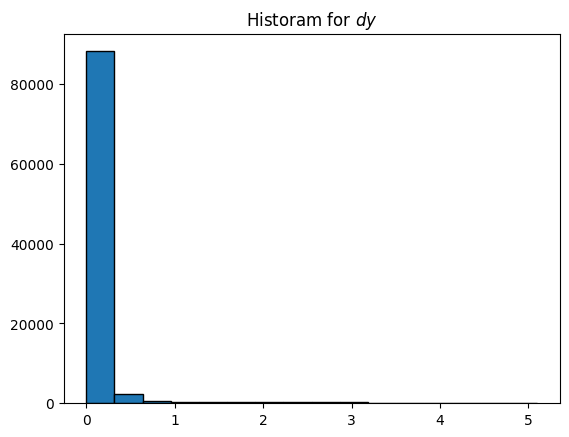

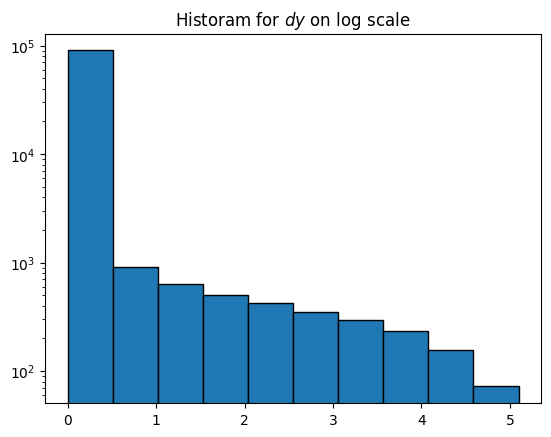

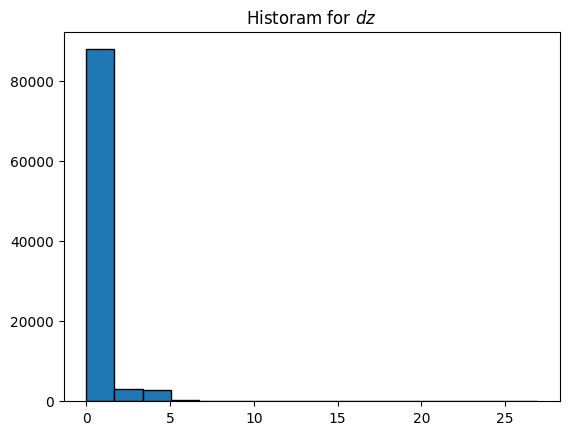

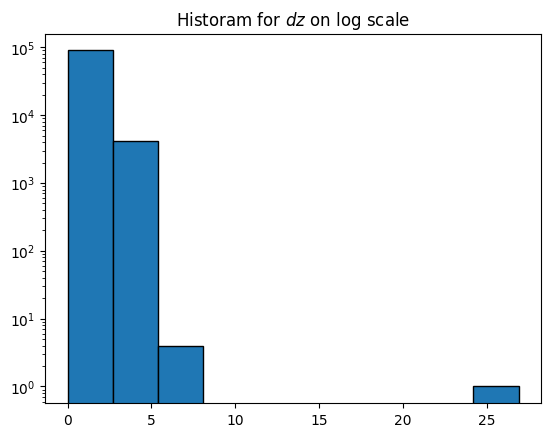

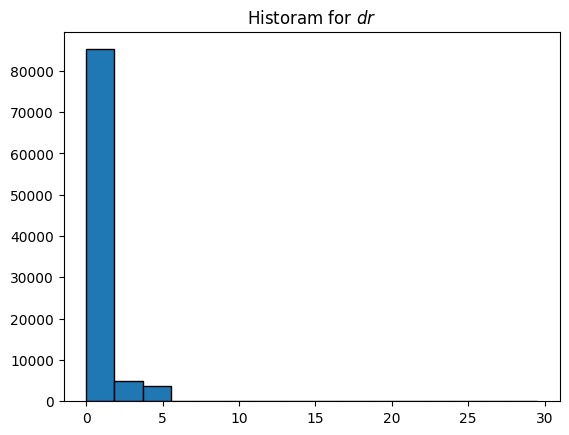

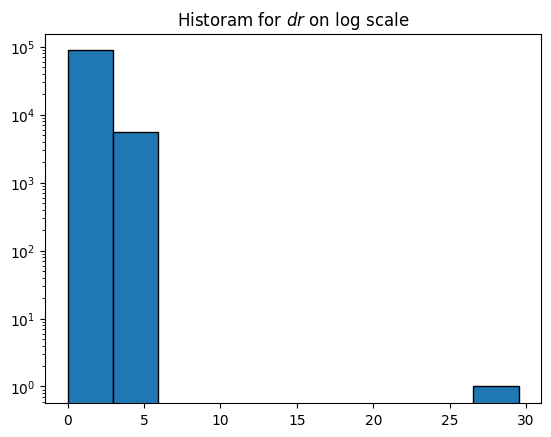

In [18]:
dx = abs(truth.tx - hits.x )
dy = abs(truth.ty - hits.y )
dz = abs(truth.tz - hits.z )
dr = np.sqrt( dx**2 + dy**2 + dz**2 )

dr_dict = {'dx':dx , 'dy':dy , 'dz':dz , 'dr':dr}
for dl , values in dr_dict.items() : 
    plt.hist( values ,  bins = 16  , edgecolor = 'k' )
    plt.title(fr'Historam for ${dl}$')
    plt.show()
    plt.hist( values ,  edgecolor = 'k' )
    plt.semilogy()
    plt.title(fr'Historam for ${dl}$ on log scale')
    plt.show()

we see that we have got a single outlier for dx , dz and dr! 

In [19]:
outdx = np.where( abs( dx  ) > 7 )[0]
outdz = np.where( abs( dz ) > 10 )[0]
outdr = np.where( abs( dr ) > 10 )[0]
outdx , outdx , outdr 
# same outlier for all three cases 

(array([57947]), array([57947]), array([57947]))

In [20]:
outdx[0] in idx 
# the value is not in the fake hits index -: Its indeed a true particle hit ! 

False

In [21]:
print('hits:')
display( hits.iloc[outdx] )
print('cells:')
display( cells.loc[ cells.hit_id.isin( hits.iloc[outdx].hit_id ) ]   ) 
print('truth:')
display( truth.iloc[outdx] )
# display( hits.iloc[outdx])

hits:


,hit_id,x,y,z,volume_id,layer_id,module_id,ncells
57947,57948,-49.3467,-255.823,694.315,13,2,689,347


cells:


,hit_id,ch0,ch1,value
377248,57948,361,35,1.0
377249,57948,595,0,1.0
377250,57948,473,18,1.0
377251,57948,484,17,1.0
377252,57948,461,20,1.0
...,...,...,...,...
377590,57948,571,4,1.0
377591,57948,511,13,1.0
377592,57948,459,21,1.0
377593,57948,392,31,1.0


truth:


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
57947,57948,405330357374681088,-38.1145,-260.382,667.415,-0.143875,-0.436118,1.18225,0.000005


note in fact from a pervious graph of ncells for each hit_id this is the only hit that has more than 100 cells recording the data.

In [22]:
for dl , values in dr_dict.items(): 
    print('for {:2s}: mean = {:<12.8f} SD = {:<12.8f}'.format(dl , np.mean(values) , np.std(values)))
    print('-'*45)

for dx: mean = 0.10665630   SD = 0.45253007  
---------------------------------------------
for dy: mean = 0.10507179   SD = 0.44716385  
---------------------------------------------
for dz: mean = 0.28785583   SD = 0.87753530  
---------------------------------------------
for dr: mean = 0.44835049   SD = 1.03878084  
---------------------------------------------


although the mean is almost zero we see that sd $\approx \mathcal{O}(1)$. We next analyise if this there divations are safe to neglet or not by studying clusters of hits that fall within $\mathcal{O}(1)$ of dr 

Max Neighbours      :6   
-----------------------
Min Neighbours      :0   
-----------------------
Average Neighbours  :0.09


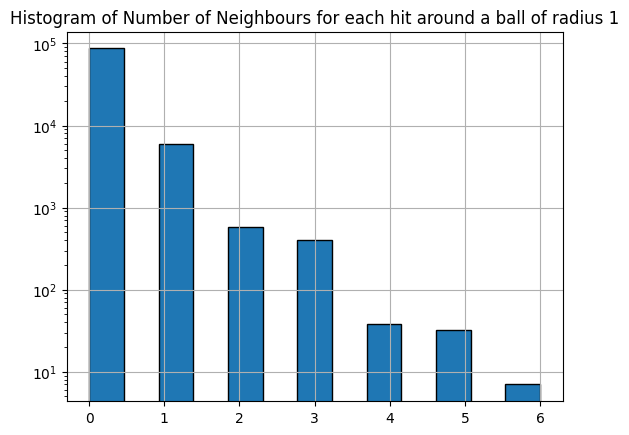

In [23]:
# make a function to analyise the clusters of the hits : 
def VisualizeCluster(hits:pd.DataFrame,r:float=1)->np.ndarray: 
    '''
        Number of hits around a r ball centered at each hit. 
        param hits : the hits dataframe 
        param r    : the radius of the sphere 
    '''
    x , y , z = hits.x.to_list() , hits.y.to_list() , hits.z.to_list()
    x, y, z = zip( *sorted( zip( x , y , z )))
    x , y , z = list( x ) , list( y ) , list( z )
    
    nhits = hits.shape[0]
    nbbhits = np.zeros( nhits , dtype = int )
    
    for i in range(nhits):
        for j in range(i+1,nhits): 
            if x[j] - x[i] > r : 
                break 
            if ( x[j] - x[i] )**2 + ( y[j] - y[i] )**2 + (z[j] - z[i] )**2 < r*r : 
                nbbhits[i] += 1 
                nbbhits[j] += 1 
    
    print('{:<20s}:{:<4d}'.format('Max Neighbours' , np.max(nbbhits) ) )
    print('-'*23)
    print('{:<20s}:{:<4d}'.format('Min Neighbours' , np.min(nbbhits) ) )
    print('-'*23)
    print('{:<20s}:{:<4.2f}'.format('Average Neighbours' , np.mean(nbbhits) ) )
    
    plt.hist( nbbhits , edgecolor = 'k' , bins = 2*np.unique(nbbhits).size -1   )
    plt.title(fr'Histogram of Number of Neighbours for each hit around a ball of radius {r}')
    plt.semilogy()
    plt.grid()
    plt.show()
    
    return nbbhits

cluster1 = VisualizeCluster(hits)

In [24]:
counts = pd.DataFrame( {'Neighbours':cluster1} )['Neighbours'].value_counts()
display( counts )
print('-'*30)
print('Percent of Hits with Neighbours within the ball {:.4f}%'.format(100 - counts[0]*100/cluster1.shape[0]))

Neighbours
0    86859
1     5913
2      582
3      399
4       38
5       32
6        7
Name: count, dtype: int64

------------------------------
Percent of Hits with Neighbours within the ball 7.4294%


With this wee see that almost 10% of the data are as closley seperated as the standard diviation of the diffrence in the acctual point and measured positions of the particle hit. 

since this is quite significant it is adviced to take into the cells data for better performance. 

### 3. Study Trajectory of a particle in the dectector : 

In [25]:
# lets check the particle with the most number of hists : 
maxhit_particleId = event_data['particles'].particle_id[ event_data['particles'].nhits.idxmax() ]
print( 'Particle Id: ' , maxhit_particleId)

maxhit_particle_hits = event_data['truth'][ event_data['truth']['particle_id'] == maxhit_particleId ]
maxhit_particle_hits

Particle Id:  774627107367026688


,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
595,596,774627107367026688,164.5830,46.6279,-1502.000,0.596762,0.125956,-5.32207,0.000004
628,629,774627107367026688,164.1350,46.5335,-1498.000,0.594598,0.125519,-5.32289,0.000004
1787,1788,774627107367026688,142.2610,41.7117,-1302.000,0.593379,0.136102,-5.32282,0.000004
1828,1829,774627107367026688,141.8150,41.6105,-1298.000,0.594345,0.133556,-5.32333,0.000004
3220,3221,774627107367026688,119.9730,36.4958,-1102.000,0.592270,0.144493,-5.32333,0.000004
3271,3272,774627107367026688,119.5280,36.3878,-1098.000,0.591719,0.142714,-5.32397,0.000004
4926,4927,774627107367026688,104.4450,32.6474,-962.000,0.589626,0.150466,-5.32404,0.000004
4978,4979,774627107367026688,104.0030,32.5341,-958.000,0.588614,0.150999,-5.32460,0.000005
6838,6839,774627107367026688,88.5332,28.4517,-818.000,0.587061,0.158545,-5.32507,0.000007
6939,6940,774627107367026688,88.9742,28.5710,-822.000,0.587447,0.159317,-5.32452,0.000006


In [26]:
# analyise the corrosponding hits in the dector : 
event_data['hits'][event_data['hits']['hit_id'].isin( maxhit_particle_hits['hit_id'] )]

,hit_id,x,y,z,volume_id,layer_id,module_id,ncells
595,596,164.5820,46.6451,-1502.000,7,2,59,2
628,629,164.1200,46.5438,-1498.000,7,2,61,2
1787,1788,142.2550,41.7021,-1302.000,7,4,59,2
1828,1829,141.8100,41.5974,-1298.000,7,4,61,1
3220,3221,119.9600,36.5098,-1102.000,7,6,59,2
3271,3272,119.5270,36.3963,-1098.000,7,6,61,1
4926,4927,104.4450,32.6551,-962.000,7,8,59,1
4978,4979,104.0120,32.5146,-958.000,7,8,61,2
6838,6839,88.5443,28.4308,-818.000,7,10,58,2
6939,6940,88.9878,28.5526,-822.000,7,10,60,1


In [27]:
particles.shape 

(8964, 9)

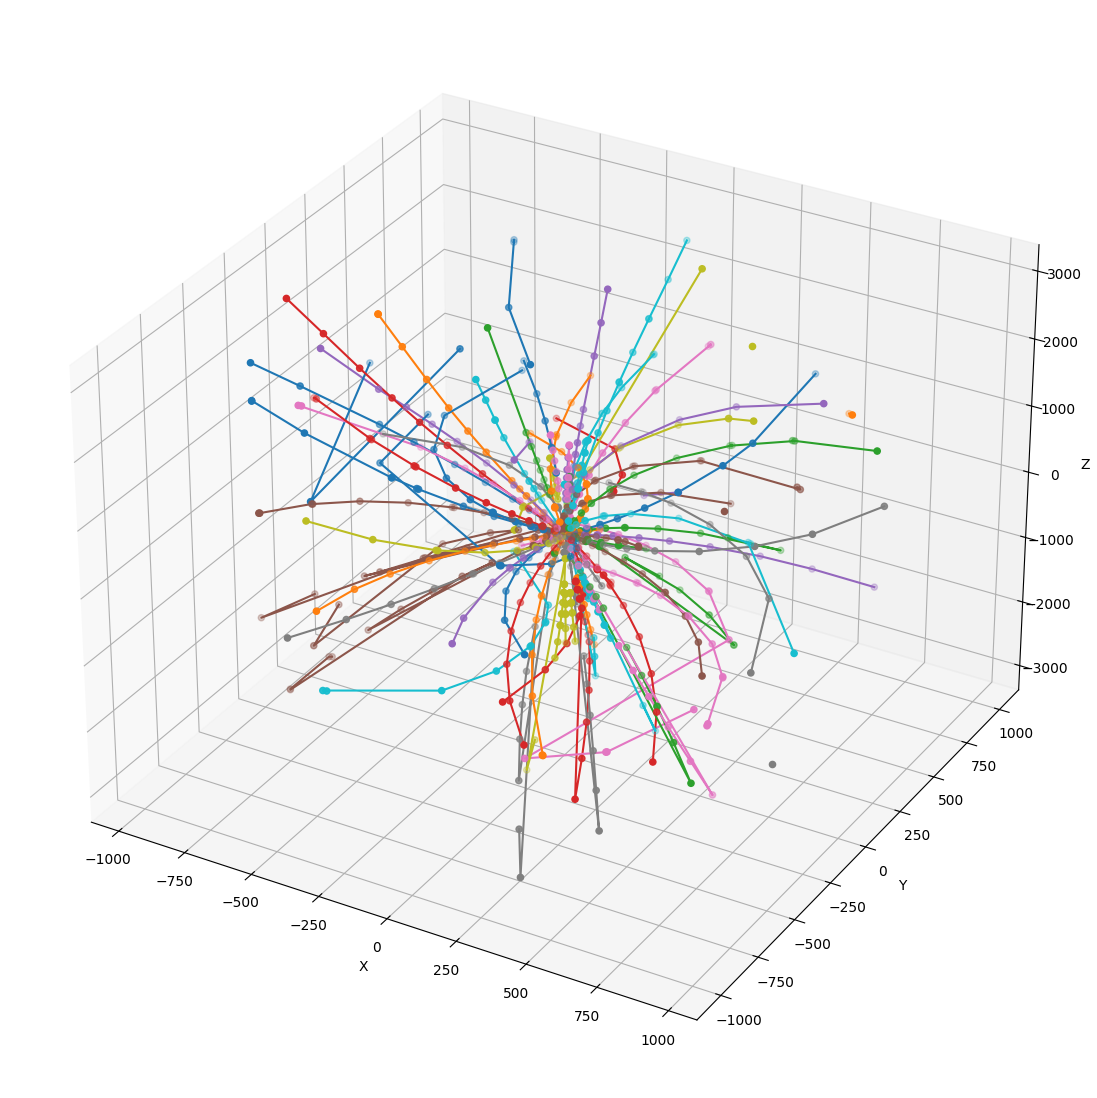

In [28]:
# we write a function to see if the particle trajectories 
from mpl_toolkits.mplot3d import Axes3D

# traj = []
# for all the particles : 
fig = plt.figure(figsize=( 14 , 14  ))
ax = fig.add_subplot(111, projection='3d')

num_particles = 100 
particlesIds = random.sample( range(particles.shape[0]) , num_particles )

for particleId in particles.particle_id[particlesIds] :
    # find all the hitId's that this particle is associated to : 
    particle_hits = truth.loc[truth.particle_id == particleId].hit_id.to_list()
    # get the trajeectory by reading the hits : 
    particle_traj  = hits.loc[hits.hit_id.isin(particle_hits)]
    ax.plot( particle_traj.x.to_list() , particle_traj.y.to_list() , particle_traj.z.to_list() ) 
    ax.scatter3D( particle_traj.x.to_list() , particle_traj.y.to_list() , particle_traj.z.to_list() )

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

## Analyise the Test Data 

In [29]:
test_dataset_path = '../data/test/'

test_events = [
    code[:-9] for code in os.listdir(test_dataset_path) if code.endswith('-hits.csv') 
]

test_event = str( np.random.choice( test_events ) ) 
print(test_event )



data = read_event_files(test_dataset_path , test_event , train = False )

event000000017


In [30]:
data['hits']

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-88.2373,-2.15466,-1502.5,7,2,1
1,2,-61.0296,-13.20400,-1502.5,7,2,1
2,3,-58.8054,-3.90085,-1502.5,7,2,1
3,4,-57.2561,-10.09840,-1502.5,7,2,1
4,5,-96.0082,-14.50240,-1502.5,7,2,1
...,...,...,...,...,...,...,...
131772,131773,-868.9390,38.55390,2944.5,18,12,97
131773,131774,-878.4780,45.46980,2952.5,18,12,98
131774,131775,-885.1880,104.44800,2952.5,18,12,98
131775,131776,-878.9150,38.52360,2952.5,18,12,98


In [31]:
data['cells']

,hit_id,ch0,ch1,value
0,1,72,1033,0.354060
1,2,335,567,0.065760
2,2,335,566,0.246805
3,3,153,514,0.242151
4,3,153,513,0.054948
...,...,...,...,...
722015,131774,519,1,1.000000
722016,131774,518,1,1.000000
722017,131775,1005,2,1.000000
722018,131776,460,1,1.000000


In [32]:
data['cells'].shape[0] / data['hits'].shape[0]

5.4791048513777065

In [33]:
# get the size of the example submittion file in MB: 
os.path.getsize('../data/sample_submission.csv')/( 1024 * 1024 ) 

145.72127723693848

In [34]:
nrows = 5 
submission = pd.read_csv('../data/sample_submission.csv' , nrows = nrows )

In [35]:
submission

,event_id,hit_id,track_id
0,0,1,0
1,0,2,0
2,0,3,0
3,0,4,0
4,0,5,0


Before we begin we start a breif study of the dector: 

In [36]:
path = '../data/detectors.csv'
# check the size of the file :
os.path.getsize( path )/( 1024*1024 ) 

1.8520984649658203

In [37]:
dector = pd.read_csv(path)
dector

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046184,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18723,18,12,94,-895.8950,291.09400,2952.5,0.309017,-0.951057,0.0,0.951057,...,0.0,0,0,1,0.35,66.0,72.0,78,0.12,10.40000
18724,18,12,95,-812.0900,161.53500,2947.5,0.195090,-0.980785,0.0,0.980785,...,0.0,0,0,1,0.35,54.0,64.2,78,0.12,10.40000
18725,18,12,96,-925.3150,176.51300,2955.5,0.187381,-0.982287,0.0,0.982287,...,0.0,0,0,1,0.35,66.0,72.0,78,0.12,10.40000
18726,18,12,97,-826.2270,54.15380,2944.5,0.065403,-0.997859,0.0,0.997859,...,0.0,0,0,1,0.35,54.0,64.2,78,0.12,10.40000


Our Goal is to reconstruct the the particle trajectory: i.e. connect the hits that belong to a single trajectory. 